In [62]:
import keras
model = keras.models.load_model('best-cnn-model.keras')

#### 층의 정보
`model.layers` : list 형태로 층의 정보가 담겨 있다. (`[0]`, `[1]`, `[2]`, ... 로 접근 가능)

2번째 층(conv) `<Conv2D name=conv2d_13, built=True>`는 앞선 층(`<Conv2D name=conv2d_12, built=True>`)을 포함하고 있음.

In [63]:
model.layers

[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_10, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_11, built=True>,
 <Dropout name=dropout_5, built=True>,
 <Dense name=dense_12, built=True>]

In [64]:
conv = model.layers[0]        # <Conv2D name=conv2d_12, built=True>
print(conv.weights[0].shape)  # 가중치
print(conv.weights[1].shape)  # 절편

(3, 3, 1, 32)
(32,)


In [65]:
# 가중치의 평균, 표준편차
conv_weights = conv.weights[0].numpy()
print("평균:", conv_weights.mean(), "표준편차:", conv_weights.std())

평균: -0.02655352 표준편차: 0.22763114


[참고]

`.mean()`(평균): 중심값(대표값)이 어디에 있는지\
`.std()`(표준편차): 값들이 중심값에서 얼마나 멀리 흩어져 있는지

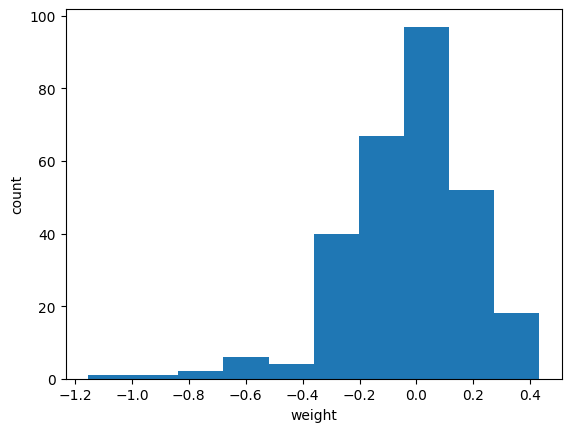

In [66]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

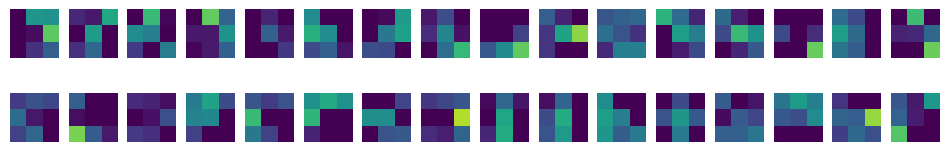

In [73]:
# 가중치 시각화
_, axs = plt.subplots(2, 16, figsize=(12, 2))
for i in range(2):  # 0, 1
    for j in range(16):
        cols = i * 16 + j
        axs[i, j].imshow(conv_weights[:, :, 0, cols], vmin=-0.1, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [68]:
# 층 구성 - 학습하지 않은 빈 모델
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Input(shape=(28, 28, 1)))  # 1: 흑백 채널
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [69]:
no_training_conv = no_training_model.layers[0]
no_training_weights = no_training_conv.weights[0].numpy()

print("평균:", no_training_weights.mean(), "표준편차:", no_training_weights.std())

평균: -0.0017045666 표준편차: 0.08180055


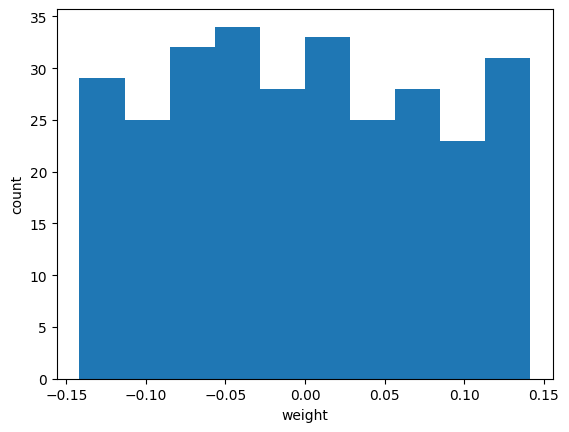

In [70]:
import matplotlib.pyplot as plt

plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel("weight")
plt.ylabel("count")
plt.show()

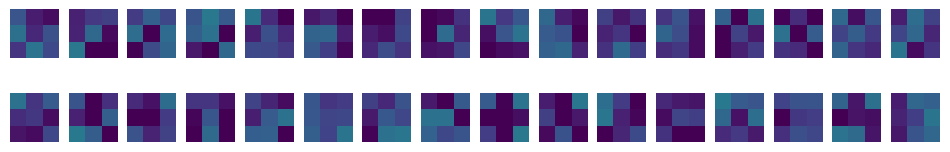

In [74]:
# 가중치 시각화
_, axs = plt.subplots(2, 16, figsize=(12, 2))
for i in range(2):  # 0, 1
    for j in range(16):
        cols = i * 16 + j
        axs[i, j].imshow(no_training_weights[:, :, 0, cols], vmin=-0.1, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [ ]:
# 특성맵 시각화


[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_10, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_11, built=True>,
 <Dropout name=dropout_5, built=True>,
 <Dense name=dense_12, built=True>]

In [76]:
# Fashion MNIST 데이터 불러오기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

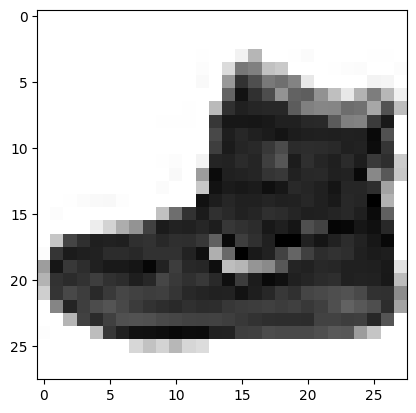

In [77]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [78]:
# 특성맵 만들기 (fm = feature map)
conv_fm1 = keras.Model(model.inputs[0], model.layers[0].output)  

학습한 첫 번째 특성맵을 확인하려면, predict()로 출력 결과를 확인 (..., 28, 28, 32)\
-> same padding으로 만들었기 때문에 32

In [ ]:
# 전처리

ankle_boot = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0  # 이미지 1개만 통과시켰다
feature_maps = conv_fm1.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


In [ ]:
feature_maps.shape  # 1: 이미지 1개

(1, 28, 28, 32)

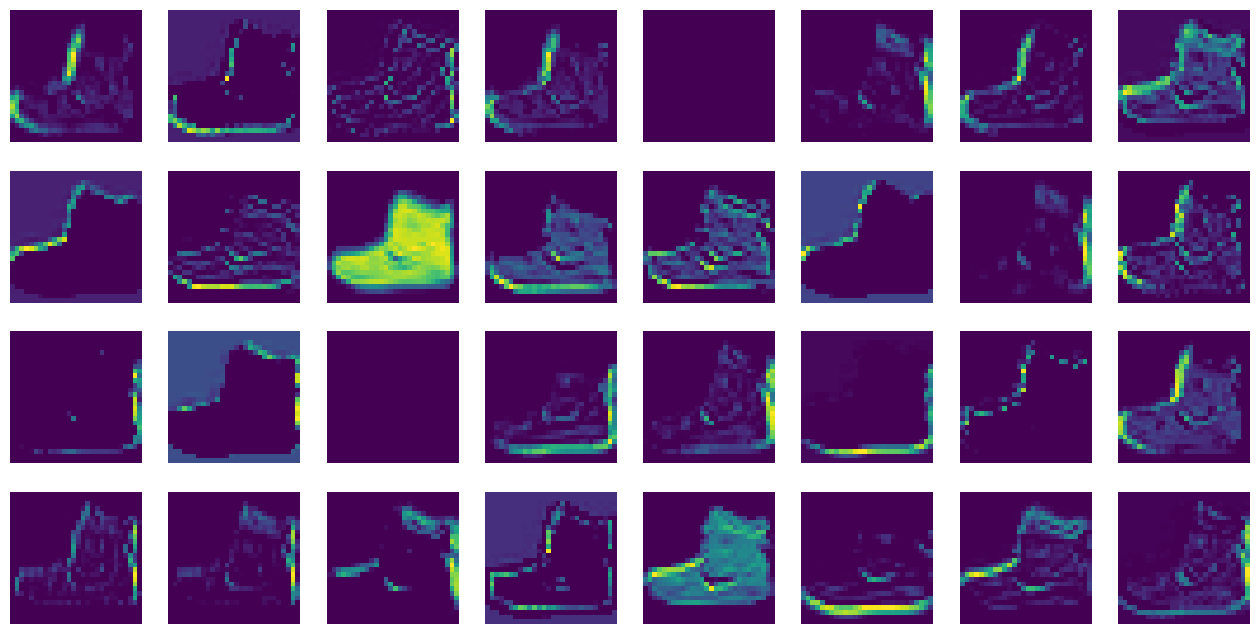

In [ ]:
# 4행 8열의 서브플롯 생성 (총 32개), 전체 그림 크기를 (16인치, 8인치)로 설정
_, axs = plt.subplots(4, 8, figsize=(16, 8))

# 32개의 feature map을 4행 8열 격자로 시각화
for i in range(4):
    for j in range(8):
        # feature_maps[0, k, :, :]에서 k번째 채널의 특성 맵 시각화
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')  # 축(눈금과 라벨) 제거
    
plt.show()

-> 1개를 통과 시켜 만든 특성맵 (4x8)

In [83]:
model.layers

[<Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Conv2D name=conv2d_13, built=True>,
 <MaxPooling2D name=max_pooling2d_10, built=True>,
 <Flatten name=flatten_6, built=True>,
 <Dense name=dense_11, built=True>,
 <Dropout name=dropout_5, built=True>,
 <Dense name=dense_12, built=True>]

In [ ]:
# model의 입력부터 model의 2번째 층까지 잘라서 저장
conv_fm2 = keras.Model(model.inputs[0], model.layers[2].output)
conv_fm2.layers

[<InputLayer name=input_layer_7, built=True>,
 <Conv2D name=conv2d_12, built=True>,
 <MaxPooling2D name=max_pooling2d_9, built=True>,
 <Conv2D name=conv2d_13, built=True>]

In [86]:
feature_maps = conv_fm2.predict(ankle_boot)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [87]:
feature_maps.shape

(1, 14, 14, 64)

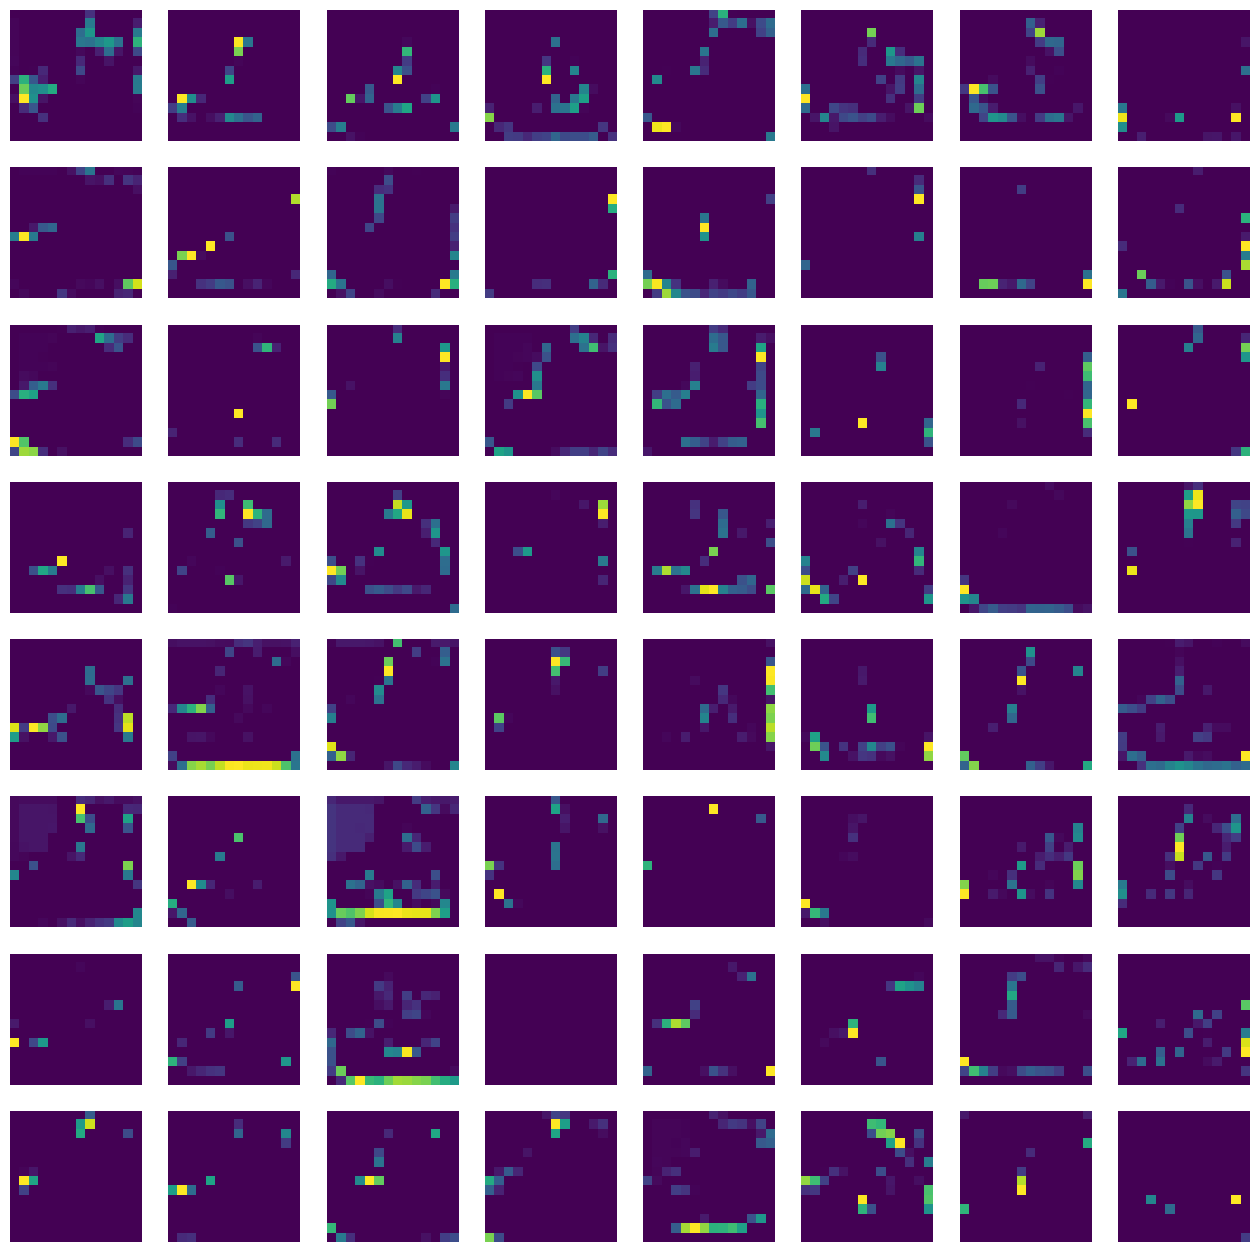

In [88]:
_, axs = plt.subplots(8, 8, figsize=(16, 16))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')  # 축 제거
    
plt.show()